# Why do all good things come to an end?


  > Flames to dust
  >
  > Lovers to friends
  >
  > Why do all good things come to an end?
  >
  > Nelly Furtado, https://www.youtube.com/watch?v=4pBo-GL9SRg

# Do they?

Remember how we started?

```python
import re
import random
import eliza_language as lang


def reflect(fragment):
    tokens = fragment.lower().split()
    for i, token in enumerate(tokens):
        if token in lang.REFLECTIONS:
            tokens[i] = lang.REFLECTIONS[token]
    return ' '.join(tokens)


def analyze(statement):
    for pattern, responses in lang.PSYCHOBABBLE:
        match = re.match(pattern, statement.rstrip(".!"))
        if match:
            response = random.choice(responses)
            return response.format(*[reflect(g) for g in match.groups()])


def talk_to_me():
    print("Hello. How are you feeling today?")

    while True:
        statement = input("> ")
        print(analyze(statement))
```

# A Bit About the Web...

![](https://sureshemre.files.wordpress.com/2014/05/synapticnetwork.png)

# Web Servers

  > Web server refers to server software, or hardware dedicated to running said software, that can serve contents to the World Wide Web. A web server processes incoming network requests over the HTTP protocol (and several other related protocols).
  >
  > https://en.wikipedia.org/wiki/Web_server

# Computers have adresses too!


<img src="https://cdn.britannica.com/700x450/38/30238-004-9DEBEAB7.jpg" alt="Drawing" style="width: 500px;"/>

Just like houses in a street, computers in a network have their own address. These addresses are usually called _IP_ addresses.

<img src="http://www.certblaster.com/wp-content/uploads/2016/10/NAT-1024x677.png" alt="Drawing" style="width: 500px;"/>


<img src="images/postnumre.png" alt="Drawing" style="width: 500px;"/>
https://github.com/ok-dk/dagi/blob/master/geojson/postnumre.geojson

## What is my IP Address?

You can find your computer's externally visible IP address in Python with the help of the `socket` module.

In [10]:
import socket


host_name = socket.gethostname()
ip_address = socket.gethostbyname(host_name)

print(f"My computer's name:       {host_name}")
print(f"My computer's IP address: {ip_address}")

My computer's name:       Willybee.local
My computer's IP address: 10.28.41.71


## How can I make my computer a webserver?

Using the `flask` module, see http://flask.pocoo.org, you can create a simple webserver as in the following:

```python
from flask import Flask

app = Flask(__name__)

@app.route("/")
def hello():
    return 'Hello World!'

if __name__ == '__main__':
    app.run()
```

Type in the above program and run it as usual via the console: `$ python simple_server.py`.

Now, open your browser and point it to the address: http://127.0.0.1:5000/ you should see a hello world message. 

<img src="images/hello_world_server.png" alt="Drawing" style="width: 500px;"/>

### What is the code doing?


```python
from flask import Flask


app = Flask(__name__)

@app.route("/")
def hello():
    return 'Hello World!'


if __name__ == '__main__':
    app.run()
```

### What was going on here?

The IP address `127.0.0.1` usually points to your own machine. Imagine it as a network wire connecting your computer to itself.

<img src="https://dudes.berrydejager.com/wp-content/uploads/2014/12/IMG_8846.jpg" alt="Drawing" style="width: 500px;"/>

That is, you are now running a webserver `simple_server.py` and a client -your browser- on the same machine. 

### What does the `:5000` mean?

That number is a so called _port number_. You can assign each running program a port to which it listens. That is, port numbers are similar to the names of your family members living under the same address as you do.

The default port that Flask assigns a webserver on startup is `5000`. That is, `5000` is the `John Doe` in the world of Flask. The standard port for webservers is usually `80`.

## But how can I connect to another computer?

You have to know it's address! During this session the IP address of my computer is:  

In [2]:
import socket


host_name = socket.gethostname()
ip_address = socket.gethostbyname(host_name)

print(f"Helge's computer's IP address: {ip_address}")

Helge's computer's IP address: 192.168.1.6


Now, I am starting a webserver on my computer.
That is, during this session you should be able to access webpages via the following links:


  * http://165.227.144.106:5000
  * http://165.227.144.106:5000/index.html
  * http://165.227.144.106:5000/image
  * http://165.227.144.106:5000/complete
  * http://165.227.144.106:5000/hello_from

<img src="images/helge_hello_world_server.png" alt="Drawing" style="width: 500px;"/>

## How does that work?

I started the following program, which you can find under https://github.itu.dk/itu-summer/qualification-seminar-materials-2018/session-10/simple_web_server/server.py Note, I started the server on address `0.0.0.0`, which means that the server is publicly accessible to other computers in the network.


```python
import socket
from flask import Flask, render_template, send_from_directory


app = Flask(__name__, static_url_path='')


@app.route('/')
@app.route('/index')
def index():
    return app.send_static_file('index.html')


@app.route('/image')
def serve_file():
    return send_from_directory('./static', 'commander_keen.png')
```


```python
@app.route('/complete')
def complete():
    return app.send_static_file('index_img.html')


@app.route('/hello_from')
def hello_from():
    host_name = socket.gethostname()
    return render_template('hello_from.html', hostname=host_name,
                           hostip=socket.gethostbyname(host_name))


if __name__ == '__main__':
    # app.run(host='127.0.0.1', debug=True)
    app.run(host='0.0.0.0', debug=True)
```


## Okay, but how does the homepage come from your computer to my computer?

We can observe which data is pushed over a network connection with a tool such as `tcpdump`

```
$ sudo tcpdump -i en0 -A -X port 5000
```

On your computer you might want to exchange the interface `lo0` with the proper network card, such as `eth0`.

TCPDump outputs something as in the following. What can you see in the decoded communication?

```
tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on en0, link-type EN10MB (Ethernet), capture size 262144 bytes
15:45:01.875739 IP 192.168.1.7.59262 > 192.168.1.5.commplex-main: Flags [S], seq 1613904668, win 65535, options [mss 1460,nop,wscale 5,nop,nop,TS val 832137774 ecr 0,sackOK,eol], length 0
	0x0000:  4500 0040 3807 4000 4006 7f54 c0a8 0107  E..@8.@.@..T....
	0x0010:  c0a8 0105 e77e 1388 6032 3b1c 0000 0000  .....~..`2;.....
	0x0020:  b002 ffff 8183 0000 0204 05b4 0103 0305  ................
	0x0030:  0101 080a 3199 6a2e 0000 0000 0402 0000  ....1.j.........
15:45:01.875959 IP 192.168.1.5.commplex-main > 192.168.1.7.59262: Flags [S.], seq 844964579, ack 1613904669, win 65535, options [mss 1460,nop,wscale 5,nop,nop,TS val 897311747 ecr 832137774,sackOK,eol], length 0
	0x0000:  4500 0040 208e 4000 4006 96cd c0a8 0105  E..@..@.@.......
	0x0010:  c0a8 0107 1388 e77e 325d 22e3 6032 3b1d  .......~2]".`2;.
	0x0020:  b012 ffff 12b3 0000 0204 05b4 0103 0305  ................
	0x0030:  0101 080a 357b e403 3199 6a2e 0402 0000  ....5{..1.j.....
15:45:01.896707 IP 192.168.1.7.59262 > 192.168.1.5.commplex-main: Flags [.], ack 1, win 4117, options [nop,nop,TS val 832137806 ecr 897311747], length 0
	0x0000:  4500 0034 fbb4 4000 4006 bbb2 c0a8 0107  E..4..@.@.......
	0x0010:  c0a8 0105 e77e 1388 6032 3b1d 325d 22e4  .....~..`2;.2]".
	0x0020:  8010 1015 424d 0000 0101 080a 3199 6a4e  ....BM......1.jN
	0x0030:  357b e403                                5{..
15:45:01.896713 IP 192.168.1.7.59262 > 192.168.1.5.commplex-main: Flags [P.], seq 1:381, ack 1, win 4117, options [nop,nop,TS val 832137808 ecr 897311747], length 380
	0x0000:  4500 01b0 3fcf 4000 4006 761c c0a8 0107  E...?.@.@.v.....
	0x0010:  c0a8 0105 e77e 1388 6032 3b1d 325d 22e4  .....~..`2;.2]".
	0x0020:  8018 1015 ccb1 0000 0101 080a 3199 6a50  ............1.jP
	0x0030:  357b e403 4745 5420 2f20 4854 5450 2f31  5{..GET./.HTTP/1
	0x0040:  2e31 0d0a 486f 7374 3a20 3139 322e 3136  .1..Host:.192.16
	0x0050:  382e 312e 353a 3530 3030 0d0a 5570 6772  8.1.5:5000..Upgr
	0x0060:  6164 652d 496e 7365 6375 7265 2d52 6571  ade-Insecure-Req
	0x0070:  7565 7374 733a 2031 0d0a 4163 6365 7074  uests:.1..Accept
	0x0080:  3a20 7465 7874 2f68 746d 6c2c 6170 706c  :.text/html,appl
	0x0090:  6963 6174 696f 6e2f 7868 746d 6c2b 786d  ication/xhtml+xm
	0x00a0:  6c2c 6170 706c 6963 6174 696f 6e2f 786d  l,application/xm
	0x00b0:  6c3b 713d 302e 392c 2a2f 2a3b 713d 302e  l;q=0.9,*/*;q=0.
	0x00c0:  380d 0a55 7365 722d 4167 656e 743a 204d  8..User-Agent:.M
	0x00d0:  6f7a 696c 6c61 2f35 2e30 2028 6950 686f  ozilla/5.0.(iPho
	0x00e0:  6e65 3b20 4350 5520 6950 686f 6e65 204f  ne;.CPU.iPhone.O
	0x00f0:  5320 3130 5f33 5f33 206c 696b 6520 4d61  S.10_3_3.like.Ma
	0x0100:  6320 4f53 2058 2920 4170 706c 6557 6562  c.OS.X).AppleWeb
	0x0110:  4b69 742f 3630 332e 332e 3820 284b 4854  Kit/603.3.8.(KHT
	0x0120:  4d4c 2c20 6c69 6b65 2047 6563 6b6f 2920  ML,.like.Gecko).
	0x0130:  4678 694f 532f 3131 2e31 6231 3033 3737  FxiOS/11.1b10377
	0x0140:  204d 6f62 696c 652f 3134 4736 3020 5361  .Mobile/14G60.Sa
	0x0150:  6661 7269 2f36 3033 2e33 2e38 0d0a 4163  fari/603.3.8..Ac
	0x0160:  6365 7074 2d4c 616e 6775 6167 653a 2065  cept-Language:.e
	0x0170:  6e2d 7573 0d0a 4163 6365 7074 2d45 6e63  n-us..Accept-Enc
	0x0180:  6f64 696e 673a 2067 7a69 702c 2064 6566  oding:.gzip,.def
	0x0190:  6c61 7465 0d0a 436f 6e6e 6563 7469 6f6e  late..Connection
	0x01a0:  3a20 6b65 6570 2d61 6c69 7665 0d0a 0d0a  :.keep-alive....
15:45:01.896799 IP 192.168.1.5.commplex-main > 192.168.1.7.59262: Flags [.], ack 1, win 4117, options [nop,nop,TS val 897311767 ecr 832137806], length 0
	0x0000:  4500 0034 5990 4000 4006 5dd7 c0a8 0105  E..4Y.@.@.].....
	0x0010:  c0a8 0107 1388 e77e 325d 22e4 6032 3b1d  .......~2]".`2;.
	0x0020:  8010 1015 4239 0000 0101 080a 357b e417  ....B9......5{..
	0x0030:  3199 6a4e                                1.jN
15:45:01.896800 IP 192.168.1.5.commplex-main > 192.168.1.7.59262: Flags [.], ack 381, win 4105, options [nop,nop,TS val 897311767 ecr 832137808], length 0
	0x0000:  4500 0034 a43e 4000 4006 1329 c0a8 0105  E..4.>@.@..)....
	0x0010:  c0a8 0107 1388 e77e 325d 22e4 6032 3c99  .......~2]".`2<.
	0x0020:  8010 1009 40c7 0000 0101 080a 357b e417  ....@.......5{..
	0x0030:  3199 6a50                                1.jP
15:45:01.898661 IP 192.168.1.5.commplex-main > 192.168.1.7.59262: Flags [P.], seq 1:18, ack 381, win 4105, options [nop,nop,TS val 897311768 ecr 832137808], length 17
	0x0000:  4500 0045 6be1 4000 4006 4b75 c0a8 0105  E..Ek.@.@.Ku....
	0x0010:  c0a8 0107 1388 e77e 325d 22e4 6032 3c99  .......~2]".`2<.
	0x0020:  8018 1009 80e8 0000 0101 080a 357b e418  ............5{..
	0x0030:  3199 6a50 4854 5450 2f31 2e30 2032 3030  1.jPHTTP/1.0.200
	0x0040:  204f 4b0d 0a                             .OK..
15:45:01.898818 IP 192.168.1.5.commplex-main > 192.168.1.7.59262: Flags [FP.], seq 18:473, ack 381, win 4105, options [nop,nop,TS val 897311768 ecr 832137808], length 455
	0x0000:  4500 01fb 9ec4 4000 4006 16dc c0a8 0105  E.....@.@.......
	0x0010:  c0a8 0107 1388 e77e 325d 22f5 6032 3c99  .......~2]".`2<.
	0x0020:  8019 1009 6fbb 0000 0101 080a 357b e418  ....o.......5{..
	0x0030:  3199 6a50 436f 6e74 656e 742d 4c65 6e67  1.jPContent-Leng
	0x0040:  7468 3a20 3133 370d 0a43 6f6e 7465 6e74  th:.137..Content
	0x0050:  2d54 7970 653a 2074 6578 742f 6874 6d6c  -Type:.text/html
	0x0060:  3b20 6368 6172 7365 743d 7574 662d 380d  ;.charset=utf-8.
	0x0070:  0a4c 6173 742d 4d6f 6469 6669 6564 3a20  .Last-Modified:.
	0x0080:  5765 642c 2033 3020 4d61 7920 3230 3138  Wed,.30.May.2018
	0x0090:  2031 353a 3130 3a33 3820 474d 540d 0a43  .15:10:38.GMT..C
	0x00a0:  6163 6865 2d43 6f6e 7472 6f6c 3a20 7075  ache-Control:.pu
	0x00b0:  626c 6963 2c20 6d61 782d 6167 653d 3433  blic,.max-age=43
	0x00c0:  3230 300d 0a45 7870 6972 6573 3a20 5475  200..Expires:.Tu
	0x00d0:  652c 2030 3520 4a75 6e20 3230 3138 2030  e,.05.Jun.2018.0
	0x00e0:  313a 3435 3a30 3120 474d 540d 0a45 5461  1:45:01.GMT..ETa
	0x00f0:  673a 2022 3135 3237 3639 3330 3338 2e30  g:."1527693038.0
	0x0100:  2d31 3337 2d34 3932 3630 3238 220d 0a44  -137-4926028"..D
	0x0110:  6174 653a 204d 6f6e 2c20 3034 204a 756e  ate:.Mon,.04.Jun
	0x0120:  2032 3031 3820 3133 3a34 353a 3031 2047  .2018.13:45:01.G
	0x0130:  4d54 0d0a 4163 6365 7074 2d52 616e 6765  MT..Accept-Range
	0x0140:  733a 2062 7974 6573 0d0a 5365 7276 6572  s:.bytes..Server
	0x0150:  3a20 5765 726b 7a65 7567 2f30 2e31 342e  :.Werkzeug/0.14.
	0x0160:  3120 5079 7468 6f6e 2f33 2e36 2e34 0d0a  1.Python/3.6.4..
	0x0170:  0d0a 3c21 444f 4354 5950 4520 6874 6d6c  ..<!DOCTYPE.html
	0x0180:  3e0a 3c68 746d 6c3e 0a3c 6865 6164 3e0a  >.<html>.<head>.
	0x0190:  3c74 6974 6c65 3e48 656c 6c6f 2057 6f72  <title>Hello.Wor
	0x01a0:  6c64 213c 2f74 6974 6c65 3e0a 3c2f 6865  ld!</title>.</he
	0x01b0:  6164 3e0a 3c62 6f64 793e 0a3c 6831 3e48  ad>.<body>.<h1>H
	0x01c0:  656c 6c6f 2057 6f72 6c64 213c 2f68 313e  ello.World!</h1>
	0x01d0:  0a59 6f75 2061 7265 2065 7874 7265 6d65  .You.are.extreme
	0x01e0:  6c79 2077 656c 636f 6d65 210a 3c2f 626f  ly.welcome!.</bo
	0x01f0:  6479 3e0a 3c2f 6874 6d6c 3e              dy>.</html>
15:45:01.907712 IP 192.168.1.7.59262 > 192.168.1.5.commplex-main: Flags [.], ack 18, win 4117, options [nop,nop,TS val 832137812 ecr 897311768], length 0
	0x0000:  4500 0034 edd5 4000 4006 c991 c0a8 0107  E..4..@.@.......
	0x0010:  c0a8 0105 e77e 1388 6032 3c99 325d 22f5  .....~..`2<.2]".
	0x0020:  8010 1015 40a5 0000 0101 080a 3199 6a54  ....@.......1.jT
	0x0030:  357b e418                                5{..
15:45:01.907717 IP 192.168.1.7.59262 > 192.168.1.5.commplex-main: Flags [.], ack 474, win 4103, options [nop,nop,TS val 832137812 ecr 897311768], length 0
	0x0000:  4500 0034 512c 4000 4006 663b c0a8 0107  E..4Q,@.@.f;....
	0x0010:  c0a8 0105 e77e 1388 6032 3c99 325d 24bd  .....~..`2<.2]$.
	0x0020:  8010 1007 3eeb 0000 0101 080a 3199 6a54  ....>.......1.jT
	0x0030:  357b e418                                5{..
15:45:01.907718 IP 192.168.1.7.59262 > 192.168.1.5.commplex-main: Flags [F.], seq 381, ack 474, win 4103, options [nop,nop,TS val 832137813 ecr 897311768], length 0
	0x0000:  4500 0034 1d85 4000 4006 99e2 c0a8 0107  E..4..@.@.......
	0x0010:  c0a8 0105 e77e 1388 6032 3c99 325d 24bd  .....~..`2<.2]$.
	0x0020:  8011 1007 3ee9 0000 0101 080a 3199 6a55  ....>.......1.jU
	0x0030:  357b e418                                5{..
15:45:01.907807 IP 192.168.1.5.commplex-main > 192.168.1.7.59262: Flags [F.], seq 473, ack 381, win 4105, options [nop,nop,TS val 897311777 ecr 832137812], length 0
	0x0000:  4500 0034 4fb6 4000 4006 67b1 c0a8 0105  E..4O.@.@.g.....
	0x0010:  c0a8 0107 1388 e77e 325d 24bc 6032 3c99  .......~2]$.`2<.
	0x0020:  8011 1009 3ee0 0000 0101 080a 357b e421  ....>.......5{.!
	0x0030:  3199 6a54                                1.jT
15:45:01.907808 IP 192.168.1.5.commplex-main > 192.168.1.7.59262: Flags [.], ack 381, win 4105, options [nop,nop,TS val 897311777 ecr 832137812], length 0
	0x0000:  4500 0034 8d65 4000 4006 2a02 c0a8 0105  E..4.e@.@.*.....
	0x0010:  c0a8 0107 1388 e77e 325d 24bd 6032 3c99  .......~2]$.`2<.
	0x0020:  8010 1009 3ee0 0000 0101 080a 357b e421  ....>.......5{.!
	0x0030:  3199 6a54                                1.jT
15:45:01.907882 IP 192.168.1.5.commplex-main > 192.168.1.7.59262: Flags [.], ack 382, win 4105, options [nop,nop,TS val 897311777 ecr 832137813], length 0
	0x0000:  4500 0034 7cf5 4000 4006 3a72 c0a8 0105  E..4|.@.@.:r....
	0x0010:  c0a8 0107 1388 e77e 325d 24bd 6032 3c9a  .......~2]$.`2<.
	0x0020:  8010 1009 3ede 0000 0101 080a 357b e421  ....>.......5{.!
	0x0030:  3199 6a55                                1.jU
15:45:01.953954 IP 192.168.1.7.59262 > 192.168.1.5.commplex-main: Flags [F.], seq 381, ack 474, win 4103, options [nop,nop,TS val 832137842 ecr 897311768], length 0
	0x0000:  4500 0034 b080 4000 4006 06e7 c0a8 0107  E..4..@.@.......
	0x0010:  c0a8 0105 e77e 1388 6032 3c99 325d 24bd  .....~..`2<.2]$.
	0x0020:  8011 1007 3ecc 0000 0101 080a 3199 6a72  ....>.......1.jr
	0x0030:  357b e418                                5{..
15:45:01.953959 IP 192.168.1.7.59262 > 192.168.1.5.commplex-main: Flags [F.], seq 381, ack 474, win 4103, options [nop,nop,TS val 832137842 ecr 897311777], length 0
	0x0000:  4500 0034 a9b8 4000 4006 0daf c0a8 0107  E..4..@.@.......
	0x0010:  c0a8 0105 e77e 1388 6032 3c99 325d 24bd  .....~..`2<.2]$.
	0x0020:  8011 1007 3ec3 0000 0101 080a 3199 6a72  ....>.......1.jr
	0x0030:  357b e421                                5{.!
15:45:01.954027 IP 192.168.1.5.commplex-main > 192.168.1.7.59262: Flags [.], ack 382, win 4105, options [nop,nop,TS val 897311822 ecr 832137813], length 0
	0x0000:  4500 0034 f1db 4000 4006 c58b c0a8 0105  E..4..@.@.......
	0x0010:  c0a8 0107 1388 e77e 325d 24bd 6032 3c9a  .......~2]$.`2<.
	0x0020:  8010 1009 3eb1 0000 0101 080a 357b e44e  ....>.......5{.N
	0x0030:  3199 6a55                                1.jU
15:45:01.954028 IP 192.168.1.5.commplex-main > 192.168.1.7.59262: Flags [.], ack 382, win 4105, options [nop,nop,TS val 897311822 ecr 832137813], length 0
	0x0000:  4500 0034 fc6d 4000 4006 baf9 c0a8 0105  E..4.m@.@.......
	0x0010:  c0a8 0107 1388 e77e 325d 24bd 6032 3c9a  .......~2]$.`2<.
	0x0020:  8010 1009 3eb1 0000 0101 080a 357b e44e  ....>.......5{.N
	0x0030:  3199 6a55                                1.jU
15:45:02.019874 IP 192.168.1.7.59262 > 192.168.1.5.commplex-main: Flags [R], seq 1613905050, win 0, length 0
	0x0000:  4500 0028 312a 4000 4006 8649 c0a8 0107  E..(1*@.@..I....
	0x0010:  c0a8 0105 e77e 1388 6032 3c9a 0000 0000  .....~..`2<.....
	0x0020:  5004 0000 94b0 0000                      P.......
15:45:02.019884 IP 192.168.1.7.59262 > 192.168.1.5.commplex-main: Flags [R], seq 1613905050, win 0, length 0
	0x0000:  4500 0028 532a 4000 4006 6449 c0a8 0107  E..(S*@.@.dI....
	0x0010:  c0a8 0105 e77e 1388 6032 3c9a 0000 0000  .....~..`2<.....
	0x0020:  5004 0000 94b0 0000                      P.......
```

The communication between our and your computer runs over a protocol with the name _HTTP_, the _Hyper-text Transfer Protocoll_, see https://www.w3.org/History/1989/proposal.html.

The protocoll was developed by Tim Berners-Lee at CERN in 1989 and forms the basis of the _Web_ as you know it.

![](http://static3.businessinsider.com/image/578f5dfedd0895cb0c8b456e-403-302/tim-berners-lee-the-inventor-of-the-web-has-3-big-fears-for-its-future.jpg)

### The first webserver...

<img src="https://1.bp.blogspot.com/-PClkpypOQag/V6WxPoqsSMI/AAAAAAAApEY/CaJk8sjd-6wG5alOU7FMdUUvQl169UkNgCLcB/s1600/first-web-server.png" alt="Drawing" style="width: 500px;"/>
![]()

You can see that your communication runs over HTTP when inspecting the complete URL for example from your browser.

For example, enter http://itu.dk in your browser and you will see ITU's homepage.

In case you see an address starting with `https://` then your communication runs via HTTP but is encrypted, i.e., _secure_.

From now on you know to be careful online. 

**All** communication via HTTP can be read by others, e.g., **everybody**.

Make sure you only enter information on systems to which you can communicate via an encrypted `https://` connection.


----------------------------------------------------

# And now?

So far, during the last weeks, we learned how to program. But constructing software is way more than only programming.

It is similar to communication in the real world. What we did so far, corresponds to that you learned how to speak a foreign language. But you did not learn how to write a captivating novel or how to hold an interesting speech.

The latter is what _software egineering_ is about.

# Software Engineering

  > **software engineering.** (1) The application of a systematic, disciplined, quantifiable approach to the development, operation, and maintenance of software; that is, the application of engineering to software. ...
  >
  >  _IEEE Standard Glossary of Software Engineering Terminology_, IEEE std 610.12-1990, 1990., 
  > see for example https://www.idi.ntnu.no/grupper/su/publ/ese/ieee-se-glossary-610.12-1990.pdf
  
That is, creating software is more that programming! 

## Did we do more than programming?

We already applied typical software engineering practices. Did we? 

Yes, partly. We applied:
  
  * Version control with Git, to distribute the latest lecture material.
  * Perhaps you used the unit tests and test cases that we provided to test your code.
  * Likely you wrote some documentation in the form of docstrings, comments, or text files.

But there are many more issues, which we did not cover in this seminar, but which you may find interesting in your further studies or your later careers.

For example:  

  * **Requirements ellicitation**, that is how to figure out what other people want to have build/solved?

  * **Software Architecture**, how to structure our system into sub-systems that are appropriate for the solution?

  * **Deployment**, how do we actually build our system and make different parts of it operate on potentially many computers?

  * **Team Management**, how do we have to organize teams so that they know what to do and get things done on time?

  * **Time/Project Management**, how do we figure out which task takes how long, figure out it's importance, and when to complete it?

  * and many more...

Consequently, software engineering is to a high degree a social process, which in turn relies heavily on interaction with others to understand what they really want.

<img src="https://www.signavio.com/wp-content/uploads/2016/09/vertical-medien-iStock_75648673_XXXLARGE.jpg?w=1200&h=480&zc=1" width=600/>


This is where IT studies are often misunderstood and clichés about nerdy developers are just wrong.

Let us try to illustrate some aspects of software engineering on the following scenario.

## Scenario

  > Let's imagine that some of your fellow students realize that you often have to collect data via surveys during your studies. In the beginning you handle those tasks via [Google Forms](https://www.google.com/forms/about/).
  >
  > Eventually, some of your fellow students realize that they do not want to continue using this service as all of your surverys along with the collected responses are stored on Google's servers.
  >
  > They come to you and utter the desire that they would like to have their own survey system.

### What could be done from that description to solve thier problem?

  * You could point them to one of the many other survey services, such as http://www.surveymonkey.com
  * You could create an email account to which respondents email their surveys and then you crowdsource the task of collecting all the replies in an Excel sheet, which will eventually be emailed to your friends.
  * and many more... your imagination sets the limits.

Now, that you know how to program with Python and that you have an idea about writing webservers with it, you are **brave** and tell you fellow students that you think you can build a small software systems, which allows them to run various kinds of surveys online.

![](images/brave.png)

But where to start?

Likely, instead of directly starting to program a system of which you think that it will appropriately implement their requirements, it is likely a good idea to talk to them to try to figure out what their requirements actually are.

<div style="float:left; width:400px">
    <img src="http://media.cleveland.com/roadrant_impact/photo/road-rant-rhoades-car-7efb1399a88e2961.jpg" width="400px"/>
</div>
<div style="float:right; width:400px">
    <img src="https://cleantechnica.com/files/2017/08/Tesla-Model-X-Silver.jpg" width="400px"/>
</div>

### How do we now what to program?

One of the most important Software Engineering activities is about how we can ellicit and capture the requirements for a project so that we are sure to not miss anything of importance in our solution and so that we provide a solution which actually matches what is desired. 

So quite likely, you have to meet with your friends and you have to try to figure out what it is that they need essentially.


![](http://gazetekarinca.com/wp-content/uploads/2017/04/anket.jpg)

#### After some meetings...

You likely figured out that they need for sure a system that can display questionaires in a browser window and that collects the responses in some form of a database.

So you start working and write a server similar to this one:
    
    
```python
import os
import sqlite3
from flask import Flask, render_template, request


app = Flask(__name__, static_url_path='')


def init_db(db='survey_replies.db'):
    # [...not displayed here...]
    pass

def save_reply_to_db(data, db='survey_replies.db'):
    # [...not displayed here...]
    pass


@app.route('/', methods=['GET', 'POST'])
def serve_file():
    if request.method == 'GET':
        return render_template('index.html')
    elif request.method == 'POST':
        users_reply = request.form
        save_reply_to_db(users_reply.values())
        return 'Thank you! Your answers are saved.'


if __name__ == '__main__':
    app.run(host='127.0.0.1', debug=True)
```

Inspect the complete code in `questionaire_server/server.py`.

<head>
    <link href="//netdna.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" rel="stylesheet">
    <title>Sample HTML Survey Form</title>
    <style></style>
</head>

<body>
    <h1><center>Sample HTML Survey Form</center></h1>
    <h4><center>Qualification Seminar</center></h4>
    <form action="/" method="post">
        <hr>
        <p>
            The purpose of the survey would be stated here at the top of the survey. This survey should take less than 10 minutes to complete. This example is based on <a href="http://www1.udel.edu/dsacher/survey/">Example online</a>
        </p>
        <p>
            Some simple demographic information could be collected with radio buttons (e.g., gender, nationality), selection boxes (e.g., date of birth, snack preferences, etc.):
        </p>
        <h3>Please tell us a little about yourself. </h3>
        <p>
            Gender:
            <input type="RADIO" name="gender" value="female">Female
            <input type="RADIO" name="gender" value="male">Male
            <input type="RADIO" name="gender" value="na">Don't want to tell
        </p>
        <p>
            Date of birth: Month
            <select name="mob">
                <option selected="" value="">?</option>
                <option value="1">Jan</option>
                <option value="2">Feb</option>
                <option value="3">Mar</option>
                <option value="4">Apr</option>
                <option value="5">May</option>
                <option value="6">Jun</option>
                <option value="7">Jul</option>
                <option value="8">Aug</option>
                <option value="9">Sept</option>
                <option value="10">Oct</option>
                <option value="11">Nov</option>
                <option value="12">Dec</option>
            </select> Day
            <select name="dob">
                <option selected="" value="">?</option>
                <option>1</option>
                <option>2</option>
                <option>3</option>
                <option>4</option>
                <option>5</option>
                <option>6</option>
                <option>7</option>
                <option>8</option>
                <option>9</option>
                <option>10</option>
                <option>11</option>
                <option>12</option>
                <option>13</option>
                <option>14</option>
                <option>15</option>
                <option>16</option>
                <option>17</option>
                <option>18</option>
                <option>19</option>
                <option>20</option>
                <option>21</option>
                <option>22</option>
                <option>23</option>
                <option>24</option>
                <option>25</option>
                <option>26</option>
                <option>27</option>
                <option>28</option>
                <option>29</option>
                <option>30</option>
                <option>31 </option>
            </select> Year
            <select name="yob">
                <option selected="" value="">??</option>
                <option>1990</option>
                <option>1991</option>
                <option>1992</option>
                <option>1993</option>
                <option>1994</option>
                <option>1995</option>
                <option>1996</option>
                <option>1997</option>
                <option>1998</option>
                <option>1999</option>
                <option>2000</option>
                <option>2001</option>
                <option>2002</option>
                <option>2003</option>
                <option>2004</option>
                <option>2005</option>
            </select>
        </p>
        <p>
            Nationality:
            <input type="RADIO" name="nation" value="1">Danish
            <input type="RADIO" name="nation" value="2">Swedish
            <input type="RADIO" name="nation" value="3">Norwegian
            <input type="RADIO" name="nation" value="4">Finish
            <input type="RADIO" name="nation" value="5">Non-Scandinavian
        </p>
        <p>
            Favorite ice-cream:
            <select name="fav_icecream">
                <option selected="" value=""> ?</option>
                <option value="1">Vanilla</option>
                <option value="2">Chocolate</option>
                <option value="3">Strawberry</option>
                <option value="4">Lemon</option>
                <option value="5">Other</option>
            </select>
        </p>
        <hr>
        <h3>Select the answer that is true most of the time.</h3>
        <p>
            <table border="">
                <tbody>
                    <tr align="CENTER">
                        <td width="75"> </td>
                        <td width="75"><b>Strongly<br>agree</b></td>
                        <td width="75"><b>Agree</b></td>
                        <td width="75"><b>Neither<br>agree<br>nor<br>disagree</b></td>
                        <td width="75"><b>Disagree</b></td>
                        <td width="75"><b>Strongly<br>disagree</b></td>
                    </tr>
                    <tr align="CENTER">
                        <td align="LEFT">
                            We did not eat sufficient ice cream during the seminar.</td>
                        <td>
                            <input type="RADIO" name="icecream" value="1">
                        </td>
                        <td>
                            <input type="RADIO" name="icecream" value="2">
                        </td>
                        <td>
                            <input type="RADIO" name="icecream" value="3">
                        </td>
                        <td>
                            <input type="RADIO" name="icecream" value="4">
                        </td>
                        <td>
                            <input type="RADIO" name="icecream" value="5">
                        </td>
                    </tr>
                    <tr align="CENTER">
                        <td align="LEFT">
                            There should have been more cake.</td>
                        <td>
                            <input type="RADIO" name="cake" value="1">
                        </td>
                        <td>
                            <input type="RADIO" name="cake" value="2">
                        </td>
                        <td>
                            <input type="RADIO" name="cake" value="3">
                        </td>
                        <td>
                            <input type="RADIO" name="cake" value="4">
                        </td>
                        <td>
                            <input type="RADIO" name="cake" value="5">
                        </td>
                    </tr>
                    <tr align="CENTER">
                        <td align="LEFT">
                            I am angry because nobody shared cookies with me.</td>
                        <td>
                            <input type="RADIO" name="cookies" value="1">
                        </td>
                        <td>
                            <input type="RADIO" name="cookies" value="2">
                        </td>
                        <td>
                            <input type="RADIO" name="cookies" value="3">
                        </td>
                        <td>
                            <input type="RADIO" name="cookies" value="4">
                        </td>
                        <td>
                            <input type="RADIO" name="cookies" value="5">
                        </td>
                    </tr>
                    <tr align="CENTER">
                        <td align="LEFT">
                            Raisins should not be a cookie ingredient.</td>
                        <td>
                            <input type="RADIO" name="ingredient" value="1">
                        </td>
                        <td>
                            <input type="RADIO" name="ingredient" value="2">
                        </td>
                        <td>
                            <input type="RADIO" name="ingredient" value="3">
                        </td>
                        <td>
                            <input type="RADIO" name="ingredient" value="4">
                        </td>
                        <td>
                            <input type="RADIO" name="ingredient" value="5">
                        </td>
                    </tr>
                </tbody>
            </table>
        </p>
        <hr>
        <p></p>
        <p>
            Do you have any additional thoughts on the topic of the survey?
            <br>
            <textarea name="comment" rows="4" cols="50"></textarea>
        </p>
        <p></p>
        <p>
            If you would like to get informed about the results of the survey, please type your e-mail address below:
            <br>
        </p>
        <center>
            E-mail address:
            <input type="text" name="email" size="40" maxlength="80">
        </center>
        <p></p>
        <p>
            Thank you for taking the survey. To submit the results, press the
            <b>Send info</b> button below.
        </p>
        <p></p>
        <p>
            <input type="submit" value="Send info">
            <input type="reset" value="Clear values">
        </p>
        <hr>
    </form>
</body>

</html>

#### You think you are done.

Now, you think you are done. 

You show the system to your friends, explain them how to use it and how to create other surveys.

But suddenly, they realize:

  > Hov, we also want to see the reponses in a nice way. Currently, they are hidden in the database.

So you take another session with them trying to understand what they mean by _"Seeing the responses in a nice way."_

That could be:

  * You create a report over all of the responses as a CSV file.
  * You create a report over all of the responses as an Excel spreadsheet.
  * You create another small websystem that shows an overview of the responses in a browser.
  * etc.

#### So you implement another small system

```python
import sqlite3
from flask import Flask, render_template, request


app = Flask(__name__, static_url_path='')


@app.route('/')
def serve_report():
    db = 'survey_replies.db'
    with sqlite3.connect(db) as conn:
        c = conn.cursor()
        c.execute('SELECT * FROM Replies')
        contents = c.fetchall()

        for idx, line in enumerate(contents):
            print(f'Reply {idx}: {line}')
    return render_template('report.html', reply_lines=contents)


if __name__ == '__main__':
    app.run(host='127.0.0.1', port=5001, debug=True)
```



<head>
</head>

<body>
    <h1><center>Replies collected so far.</center></h1>
    <table style="width:80%">
        <tbody><tr>
            <th>Gender</th>
            <th>Month</th>
            <th>Day</th>
            <th>Year</th>
            <th>Nationality</th>
            <th>Favorite Ice Cream</th>
            <th>Ice Cream</th>
            <th>Cake</th>
            <th>Cookies</th>
            <th>Ingredient</th>
            <th>Comment</th>
            <th>Email</th>
        </tr>
        
        <tr>
            <th>female</th>
            <th>5</th>
            <th>7</th>
            <th>1999</th>
            <th>3</th>
            <th>5</th>
            <th>2</th>
            <th>2</th>
            <th>3</th>
            <th>3</th>
            <th>I do not have anything to say.</th>
            <th>ano@nymous.org</th>
        </tr>
        
        <tr>
            <th>male</th>
            <th>10</th>
            <th>21</th>
            <th>2004</th>
            <th>5</th>
            <th>2</th>
            <th>1</th>
            <th>2</th>
            <th>3</th>
            <th>4</th>
            <th>I like brownies but nobody seems to be interested :(</th>
            <th>who@cares.org</th>
        </tr>
        
        <tr>
            <th>na</th>
            <th>1</th>
            <th>1</th>
            <th>1990</th>
            <th>1</th>
            <th>4</th>
            <th>4</th>
            <th>3</th>
            <th>2</th>
            <th>1</th>
            <th>Kammerjunker!</th>
            <th>ingen@ved.det</th>
        </tr>
        
    </tbody></table>
</body>

# System Integration


So suddenly you already wrote a quite complex distrubuted system, which consists of two subsystems. 

The two subsystems are integrated via access to a single database.

# Architecture

<img src="images/architecture.png" width="500px"/>

# Deployment


Currently, the survey system runs on your computer.

That is of course not a proper solution as you cannot be always at ITU and cannot have your computer always up and running when someone wants to run another survey.

So you talk to ITU's IT department to figure out if you can run your survey system on one of their servers that is accessible within ITU.

They give you access to one, you install Python on it, copy your programs over, start the server programs (listening to port `0.0.0.0`), open ports 5000 and 5001 on the servers and likely you are done.

# Monitoring

However, your system in the current state writes to one single database file.

Imagine your friends start a survey where all ITU students reply, that database file grows and suddenly it becomes bigger than the hard disk that ITU's IT department gave you...

What will happen?

Your server program will crash and nobody will be able to reply to any survey anymore.

After this happens twice, you likely come to the idea to write a small program that sends you notifications before the program will crash so that you can take appropriate meassures.

# New Features

Your current systems implements already some features, you can:

  * Create a survey manually in code
  * Others can respond to surveys online
  * Reports of surveys can be seen online
  
  
But perhaps you want to create new functionality. For example, sending reports in Excel spreadsheets to the survey creators, creating plots and statistics about replies, etc.

All those are called features of your system.

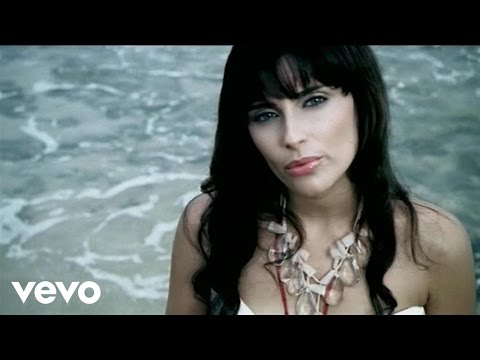

In [9]:
from IPython.display import YouTubeVideo
#YouTubeVideo("4pBo-GL9SRg", autoplay=1, theme="light")
YouTubeVideo("4pBo-GL9SRg")